In [1]:
import numpy as np
import os
import subprocess
import pandas as pd
# %run functions.py
%matplotlib inline
import time 

In [2]:
STEM = '100k'
CODE = 'julia CGE.jl '

In [3]:
## test FORCED splits
ncl = 114 ## 100k graph
edgelist = STEM + '.edgelist'
clusters = STEM + '.ecg'
embedding = STEM + '.embedding'
method = 'diameter'
Forced = [0]


In [4]:
l = [100,125,150,175]
l.extend(np.arange(200,1000,50).tolist())
l.extend(np.arange(1000,3500,500).tolist())

In [5]:

X = []
for forced in Forced:
    L = []
    for landmarks in l:
        if landmarks >= ncl*(forced):
            lm = " -l " + str(landmarks) + " -f " + str(forced) + " -m " + method            
            cmd = CODE + " -g " + edgelist + " -c " + clusters + " -e " + embedding +" -o testfile"+ lm
            t = time.time()
            s = subprocess.run(cmd, shell=True, stdout=subprocess.PIPE)
            t1 = time.time()-t
            x = s.stdout.decode().strip("\n").split(', ')  
            print(forced,landmarks,t1,float(x[1]))
            L.append([landmarks,t1,float(x[1])])
    X.append(L)
    

0 100 12.318952322006226 0.022919429334687533
0 125 13.307110071182251 0.018752473680728993
0 150 13.66526484489441 0.016219745569570076
0 175 12.529152154922485 0.01473443846582037
0 200 13.682687282562256 0.01483964683262605
0 250 17.783506870269775 0.016609327685685984
0 300 24.13506317138672 0.017507129566528314
0 350 31.955665111541748 0.018834865785426223
0 400 39.20682501792908 0.01953346254403374
0 450 47.8901093006134 0.020213534677919563
0 500 58.64724898338318 0.020748445962052463
0 550 67.32321000099182 0.02048548764693655
0 600 76.53674817085266 0.02009756918800895
0 650 89.08957624435425 0.01908378225885491
0 700 101.73537993431091 0.018580003768360713
0 750 112.08855676651001 0.01847702922314282
0 800 122.87324285507202 0.018251790593819685
0 850 130.86028695106506 0.01839308260389816
0 900 141.66524529457092 0.018475778378670846
0 950 151.18078684806824 0.01852274136831438
0 1000 158.45248985290527 0.01884600823367072
0 1500 237.46920490264893 0.019384754308227236
0 200

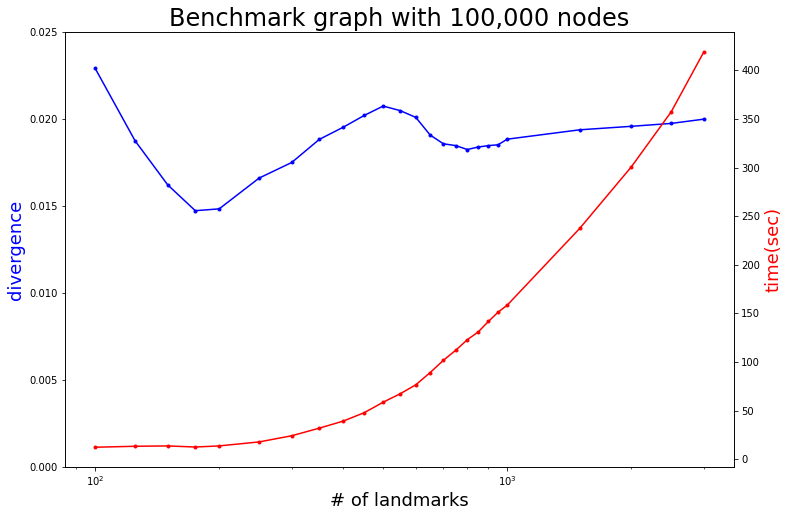

In [6]:
import matplotlib.pyplot as plt
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12,8))

# make a plot
lbl = Forced
x = [a[0] for a in X[0]]
y = [a[2] for a in X[0]]
ax.set_ylim(0,.025)
ax.semilogx(x,y,'.-',color="blue")
ax.set_xlabel("# of landmarks",fontsize=18)
ax.set_ylabel("divergence",color="blue",fontsize=18)

# twin object for two different y-axis on the sample plot
z = [a[1] for a in X[0]]
ax2=ax.twinx()
ax2.semilogx(x,z, color="red", marker=".")
ax2.set_ylabel("time(sec)",color="red",fontsize=18)

plt.title("Benchmark graph with 100,000 nodes",fontsize=24)
plt.show()
